## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
# Using Tensorflow-2.4.x
import tensorflow as tf
try:
    tf_gpus = tf.config.list_physical_devices('GPU')
    for gpu in tf_gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except:
    pass

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# 项目根目录 E:\Mask_RCNN-tf2
ROOT_DIR = os.path.abspath("../../")

# 导入 Mask RCNN
sys.path.append(ROOT_DIR)  # 查找库的本地版本
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# 用于保存日志和训练模型的目录
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# 训练权重文件的本地路径
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# 如需要，可以从发布界面来下载COCO权重：
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# shape 训练好的权重
SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

## Configurations

In [3]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset
import coco
config = coco.CocoConfig()  

## Notebook Preferences

In [4]:
# 加载神经网络的设备.
# 如果在同一台机器上训练模型很有用，这时最好使用CPU 并让GPU 进行训练.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """返回Matplotlib Axes数组，以用于笔记本中的所有可视化。
        提供一个中心点来控制图形大小.
    
    调整大小属性以控制渲染图像的大小
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [6]:
# 在 inference 模式下创建模型
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# 设置权重文件的路径
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
# 或，取消注册您培训的最后一个模型
# weights_path = model.find_last()

# 加载权重
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Loading weights  E:\Mask_RCNN-tf2\mask_rcnn_coco.h5


## Review Weight Stats

In [7]:
# 显示所有训练权重的统计数据  
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8451,+0.1315
conv1/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3179,+0.0764
res2a_branch2a/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a/beta:0,"(64,)",-2.1180,+3.7332,+1.1786


# Histograms of Weights

TODO: 清理这部分

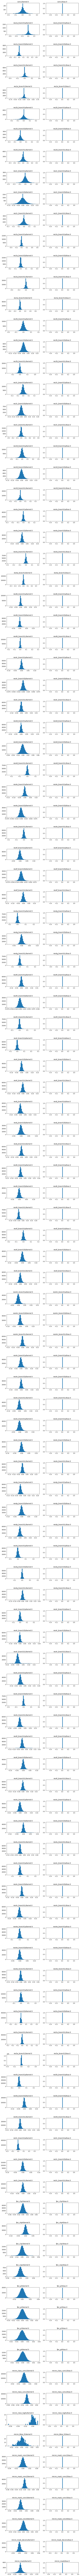

In [8]:
# 挑选图层类型以显示
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# 获取层
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# 显示直方图
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)
